In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_excel("/kaggle/input/us-videos/USvideos.xlsx")

In [17]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â–¶ \n\nSUBSCRIBE â–º ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [18]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [19]:

# Dataset  basic information
print("Basic Information:")
print(df.info())



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40552 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-n

In [20]:
# Missing values 
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Unique values count in each column
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")



Missing Values in Each Column:
video_id                  397
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Unique Values in Each Column:
video_id: 6281 unique values
trending_date: 205 unique values
title: 6455 unique values
channel_title: 2207 unique values
category_id: 16 unique values
publish_time: 6269 unique values
tags: 6055 unique values
views: 40478 unique values
likes: 29850 unique values
dislikes: 8516 unique values
comment_count: 13773 unique values
thumbnail_link: 6352 unique values
comments_disabled: 2 unique values
ratings_disabled: 2 unique values
video_error_

In [21]:
# Descriptive statistics for numerical columns
print("\nStatistical Summary for Numerical Columns:")
print(df.describe())



Statistical Summary for Numerical Columns:
        category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06


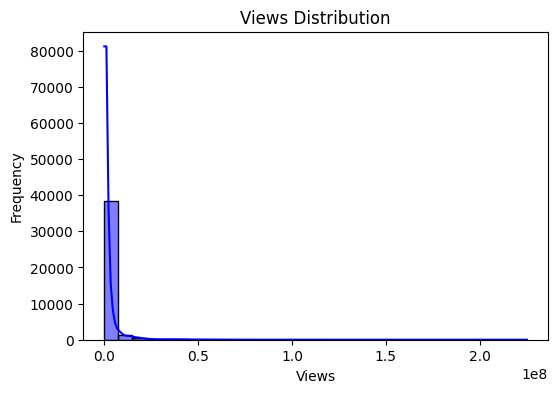

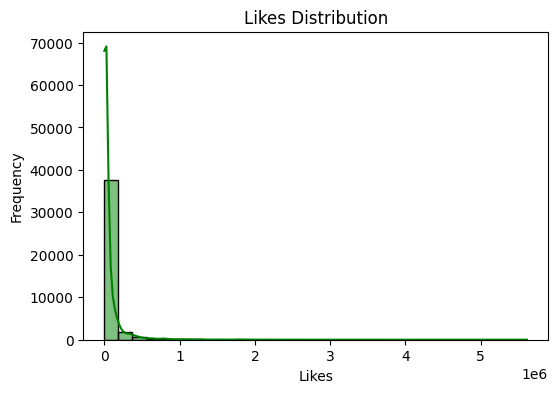

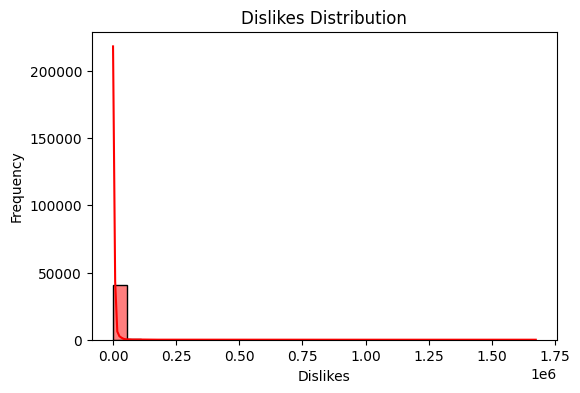

In [23]:
# Views Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['views'], bins=30, kde=True, color='blue')
plt.title('Views Distribution')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

# Likes Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['likes'], bins=30, kde=True, color='green')
plt.title('Likes Distribution')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

# Dislikes Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['dislikes'], bins=30, kde=True, color='red')
plt.title('Dislikes Distribution')
plt.xlabel('Dislikes')
plt.ylabel('Frequency')
plt.show()



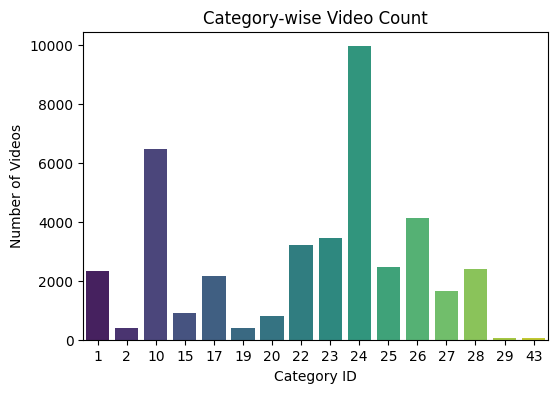

In [24]:
# Category-wise video count
plt.figure(figsize=(6, 4))
category_counts = df['category_id'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Category-wise Video Count')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.show()


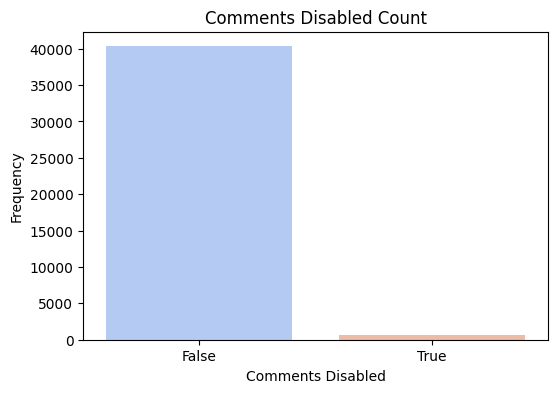

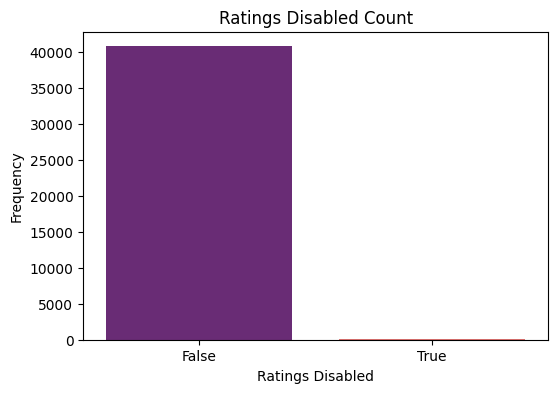

In [25]:
# Comments Disabled Count
plt.figure(figsize=(6, 4))
disabled_comments = df['comments_disabled'].value_counts()
sns.barplot(x=disabled_comments.index, y=disabled_comments.values, palette="coolwarm")
plt.title('Comments Disabled Count')
plt.xlabel('Comments Disabled')
plt.ylabel('Frequency')
plt.show()

# Ratings Disabled Count
plt.figure(figsize=(6, 4))
disabled_ratings = df['ratings_disabled'].value_counts()
sns.barplot(x=disabled_ratings.index, y=disabled_ratings.values, palette="magma")
plt.title('Ratings Disabled Count')
plt.xlabel('Ratings Disabled')
plt.ylabel('Frequency')
plt.show()


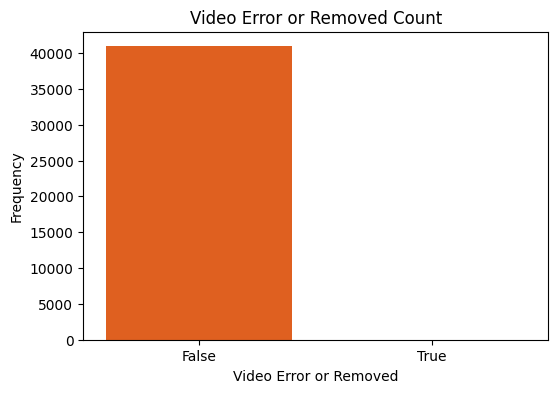

In [26]:
# Video Error or Removed Analysis
plt.figure(figsize=(6, 4))
error_removed = df['video_error_or_removed'].value_counts()
sns.barplot(x=error_removed.index, y=error_removed.values, palette="autumn")
plt.title('Video Error or Removed Count')
plt.xlabel('Video Error or Removed')
plt.ylabel('Frequency')
plt.show()
